In [61]:
# package
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
os.getcwd() # get current working directory

'/Users/vominhthinh/Workspace/pytorch/image_classification'

In [62]:
# define transforms
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.Grayscale(),
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5)),
])

In [63]:
batch_size = 4
trainset = torchvision.datasets.ImageFolder(root='data/train', transform=transform)
testset = torchvision.datasets.ImageFolder(root='data/test', transform=transform)

In [64]:
train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(testset, batch_size=batch_size)

In [65]:
def imshow(img):
    img = img / 2 + 0.5 # unormalize
    nping = img.numpy()
    plt.imshow(np.transpose(nping, (1, 2, 0)))
    plt.show()


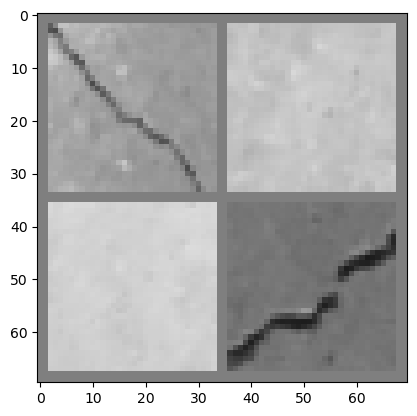

In [66]:
# get random trainning images
dataiter = iter(train_loader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images, nrow=2))

In [67]:
images[0].shape

torch.Size([1, 32, 32])

### Neral Network

In [68]:
# Setup Neral NetWork
class ImageClassification(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3) # 1 input color chanel (grayscale), 6 output chanels mean create\
        # 6 kernel to learn different feature from image, kernel size (3) = (3x3)
        # out: batch_size, 6, 30, 30
        self.pool = nn.MaxPool2d(2, 2) # out: batch_size, 6, 15, 15
        self.conv2 = nn.Conv2d(6, 16, 3) # out: batch_size, 16, 13, 13
        self.fc1 = nn.Linear(16*6*6, 128) # after next pool: batch_size, 16, 6, 6. | 128 nerals
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()


    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

In [69]:
model = ImageClassification()

In [70]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.8)

In [71]:
NUM_EPOCHS = 10
for epoch in range(NUM_EPOCHS):
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        # zero gradient
        optimizer.zero_grad()

        # forward pass
        pred = model(inputs)

        # calculate loss
        loss = loss_fn(pred, labels.reshape(-1, 1).float())

        # backward
        loss.backward()

        # update weights
        optimizer.step()

        if i % 100 == 0:
            print(f'Epoch {epoch}/{NUM_EPOCHS}, Step {i+1}/{len(train_loader)}', f'Loss: {loss.item():.4f}')


Epoch 0/10, Step 1/250 Loss: 0.7074
Epoch 0/10, Step 101/250 Loss: 0.6827
Epoch 0/10, Step 201/250 Loss: 0.0806
Epoch 1/10, Step 1/250 Loss: 0.0450
Epoch 1/10, Step 101/250 Loss: 0.0683
Epoch 1/10, Step 201/250 Loss: 0.4384
Epoch 2/10, Step 1/250 Loss: 0.0287
Epoch 2/10, Step 101/250 Loss: 0.0500
Epoch 2/10, Step 201/250 Loss: 0.0326
Epoch 3/10, Step 1/250 Loss: 0.0840
Epoch 3/10, Step 101/250 Loss: 0.0095
Epoch 3/10, Step 201/250 Loss: 0.0876
Epoch 4/10, Step 1/250 Loss: 0.0095
Epoch 4/10, Step 101/250 Loss: 0.0048
Epoch 4/10, Step 201/250 Loss: 0.0192
Epoch 5/10, Step 1/250 Loss: 0.0932
Epoch 5/10, Step 101/250 Loss: 0.0035
Epoch 5/10, Step 201/250 Loss: 0.0088
Epoch 6/10, Step 1/250 Loss: 0.0027
Epoch 6/10, Step 101/250 Loss: 0.0887
Epoch 6/10, Step 201/250 Loss: 0.0206
Epoch 7/10, Step 1/250 Loss: 0.0082
Epoch 7/10, Step 101/250 Loss: 0.0004
Epoch 7/10, Step 201/250 Loss: 0.0029
Epoch 8/10, Step 1/250 Loss: 0.1292
Epoch 8/10, Step 101/250 Loss: 0.0010
Epoch 8/10, Step 201/250 Loss:

In [76]:
y_test = []
y_test_pred = []
for i , data in enumerate(test_loader, 0):
    inputs, y_test_temp = data
    with torch.no_grad():
        y_test_hat_temp = model(inputs).round()

    
    y_test.extend(y_test_temp.numpy())
    y_test_pred.extend(y_test_hat_temp.numpy())


In [77]:
accuracy = accuracy_score(y_test, y_test_pred)
print(f'Accuracy: {accuracy*100:.3f} %')


Accuracy: 97.333 %


In [72]:
labels.shape

torch.Size([4])

In [73]:
pred.shape

torch.Size([4, 1])

In [74]:
sample = labels.reshape(-1, 1)
sample.shape

torch.Size([4, 1])